In [1]:
import numpy as np
from openpyxl import load_workbook
from astropy.time import Time
import astropy.units as u

import matplotlib.pyplot as plt

In [11]:
wb_path = '/scratch/users/ycli/.test/obs/'
#wb_file = 'SDSS_N_2a_2019_05_27_17_09_19_855.xlsx'
#wb_file = 'SDSS_N_3a_2019_05_30_17_00_34_563.xlsx'
wb_file = 'SDSS_N_2.5-1_2019_05_31.xlsx'
wb = load_workbook(wb_path + wb_file)

In [12]:
wb.sheetnames

[u'\u6574\u63a7-\u9988\u6e90\u8231\u6570\u636e', u'\u6d4b\u91cf\u6570\u636e']

In [35]:
datasheet = wb[u'\u6d4b\u91cf\u6570\u636e']

In [44]:
#for col in datasheet.iter_cols(min_col=1, max_col=3, max_row=10, values_only=True)
min_row = 4000
max_row = 20000
#print max_row
#max_row = 3447
time = [col for col in datasheet.iter_cols(min_col=1, max_col=1, min_row=min_row, max_row=max_row,
                                           values_only=True)]
data = [col for col in datasheet.iter_cols(min_col=6, max_col=8, min_row=min_row, max_row=max_row,
                                           values_only=True)]
data = np.array(data)
print data.dtype
print data[:,0]
#print time

float64
[-5.78710996e-03 -2.60768008e+00 -1.59942993e+02]


In [45]:
#print time
time = Time(time)
print time.shape
print time[0, 0].datetime
print time[0, -1].datetime


(1, 16001)
2019-05-31 17:11:12.600000
2019-05-31 18:04:32.600000


In [56]:
f = 0.4621 * 300
f = 0.461078333 * 300
print f
Rhf = 300 + 0.4732 - f
print Rhf

138.3234999
162.1497001


In [57]:
za = np.arccos(- data[2] / Rhf) * u.rad
az = np.arctan2(data[1], data[0]) * u.rad
az[az < 0 * u.deg] += 360 * u.deg
az = 270. * u.deg - az


(0.0, 30)

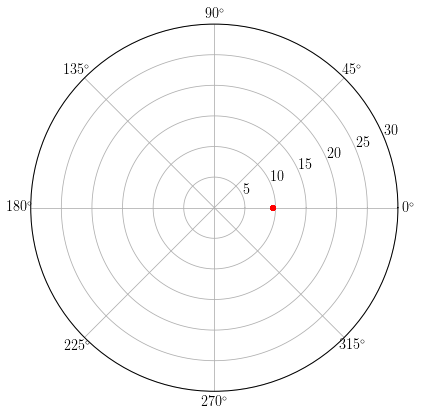

In [58]:
fig = plt.figure(figsize=[6, 6])
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85], projection='polar')
ax.plot(az.to(u.rad).value, za.to(u.deg).value, 'r.-', linewidth=1)

#ax.plot(az1.value, za.value, 'r.-', linewidth=1)
#ax.plot(az2.value, za.value, 'g.-', linewidth=1)
ax.set_rlim(rmax=30)